In [41]:
myv = {
    "設定6": {
      "BB確率": "1/260.1",
      "RB確率": "1/229.1",
      "合算確率": "1/121.8",
      "単独BB": "1/337.81",
      "単独RB": "1/327.68",
      "チェリーBB": "1/1129.93",
      "チェリーRB": "1/762.05",
      "機械割": "111.65%",
      "ぶどう": "1/5.66"
    },
    "設定5": {
      "BB確率": "1/274.2",
      "RB確率": "1/268.6",
      "合算確率": "1/135.7",
      "単独BB": "1/354.25",
      "単独RB": "1/390.10",
      "チェリーBB": "1/1213.63",
      "チェリーRB": "1/862.32",
      "機械割": "107.19%",
      "ぶどう": "1/5.76"
    },
    "設定4": {
      "単独BB": "1/378.82",
      "単独RB": "1/407.06",
      "チェリーBB": "1/1285.02",
      "チェリーRB": "1/1008.25",
      "機械割": "104.31%",
      "ぶどう": "1/5.78",
      "BB確率": "1/292.6",
      "RB確率": "1/290.0",
      "合算確率": "1/145.6"
    },
    "設定3": {
      "単独BB": "1/399.61",
      "単独RB": "1/492.75",
      "チェリーBB": "1/1365.33",
      "チェリーRB": "1/1057.03",
      "機械割": "101.19%",
      "ぶどう": "1/5.80",
      "BB確率": "1/309.1",
      "RB確率": "1/336.1",
      "合算確率": "1/161.0"
    },
    "設定2": {
      "単独BB": "1/407.06",
      "単独RB": "1/601.25",
      "チェリーBB": "1/1394.38",
      "チェリーRB": "1/1074.36",
      "機械割": "98.95%",
      "ぶどう": "1/5.85",
      "BB確率": "1/315.1",
      "RB確率": "1/385.5",
      "合算確率": "1/173.4"
    },
    "設定1": {
      "単独BB": "1/409.60",
      "単独RB": "1/655.36",
      "チェリーBB": "1/1424.70",
      "チェリーRB": "1/1092.27",
      "機械割": "97.83%",
      "ぶどう": "1/5.90",
      "BB確率": "1/318.1",
      "RB確率": "1/409.6",
      "合算確率": "1/179.1"
    },
}

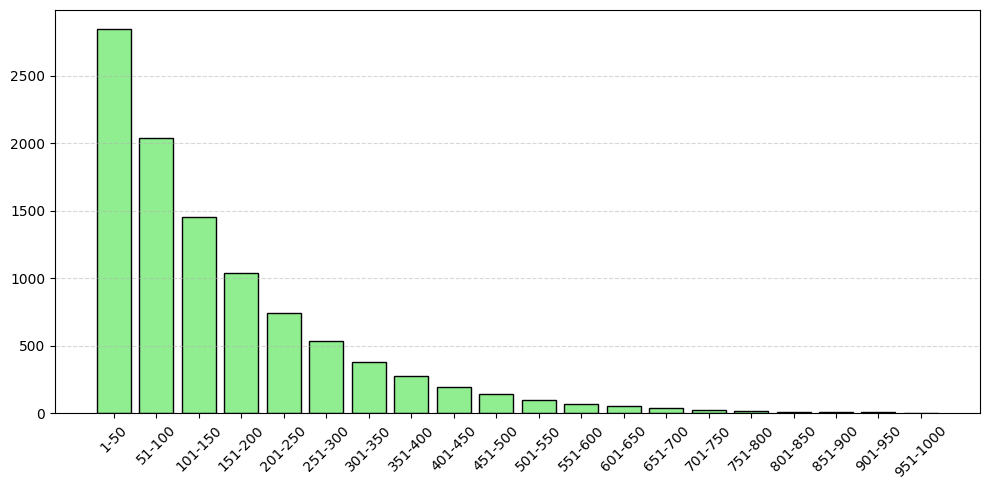

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 成功確率
p = 1/150

# 試行範囲（1〜1000回）
x = np.arange(1, 1001)
pmf = geom.pmf(x, p)  # 幾何分布の確率質量関数

# 1万回の試行での成功件数としてスケーリング
pmf_scaled = pmf * 10000

# 50回ごとのビンに分ける
bins = np.arange(0, 1050, 50)
labels = [f"{bins[i]+1}-{bins[i+1]}" for i in range(len(bins)-1)]
grouped_counts = [pmf_scaled[(x > bins[i]) & (x <= bins[i+1])].sum() for i in range(len(bins)-1)]

# グラフ描画
plt.figure(figsize=(10, 5))
plt.bar(labels, grouped_counts, color='lightgreen', edgecolor='black')
# plt.title("1/100 成功確率：50回ごとの成功回数分布（1万試行想定）")
# plt.xlabel("成功までにかかった試行回数の範囲")
# plt.ylabel("成功回数（件）")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [51]:
[(myv[f"設定{i}"]["合算確率"]).replace("1/", "") for i in range(6, 0, -1)]

['121.8', '135.7', '145.6', '161.0', '173.4', '179.1']

In [62]:
p = 121.8
def kakuritsu(p, k=200):
    p = p.replace("1/", "")
    x = np.arange(1, 1001)
    pmf = geom.pmf(x, 1/float(p))
    pmf_scaled = pmf * 10000
    rate = pmf_scaled[(x > 0) & (x <= k)].sum() / 10000
    
    return rate

for p in [myv[f"設定{i}"]["合算確率"] for i in range(6, 0, -1)]:
    print(f"{kakuritsu(p, k=100):.01%}")

56.2%
52.3%
49.8%
46.4%
43.9%
42.9%
